### 데이터 불러오기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir('/Users/choeunsol/Python/dl_study/따릉이')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

column 별 설명

id 고유 id

hour 시간

temperature 기온

precipitation 비가 오지 않았으면 0, 비가 오면 1

windspeed 풍속(평균)

humidity 습도

visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)

ozone 오존

pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)

pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)

count 시간에 따른 따릉이 대여 수

In [5]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


### EDA



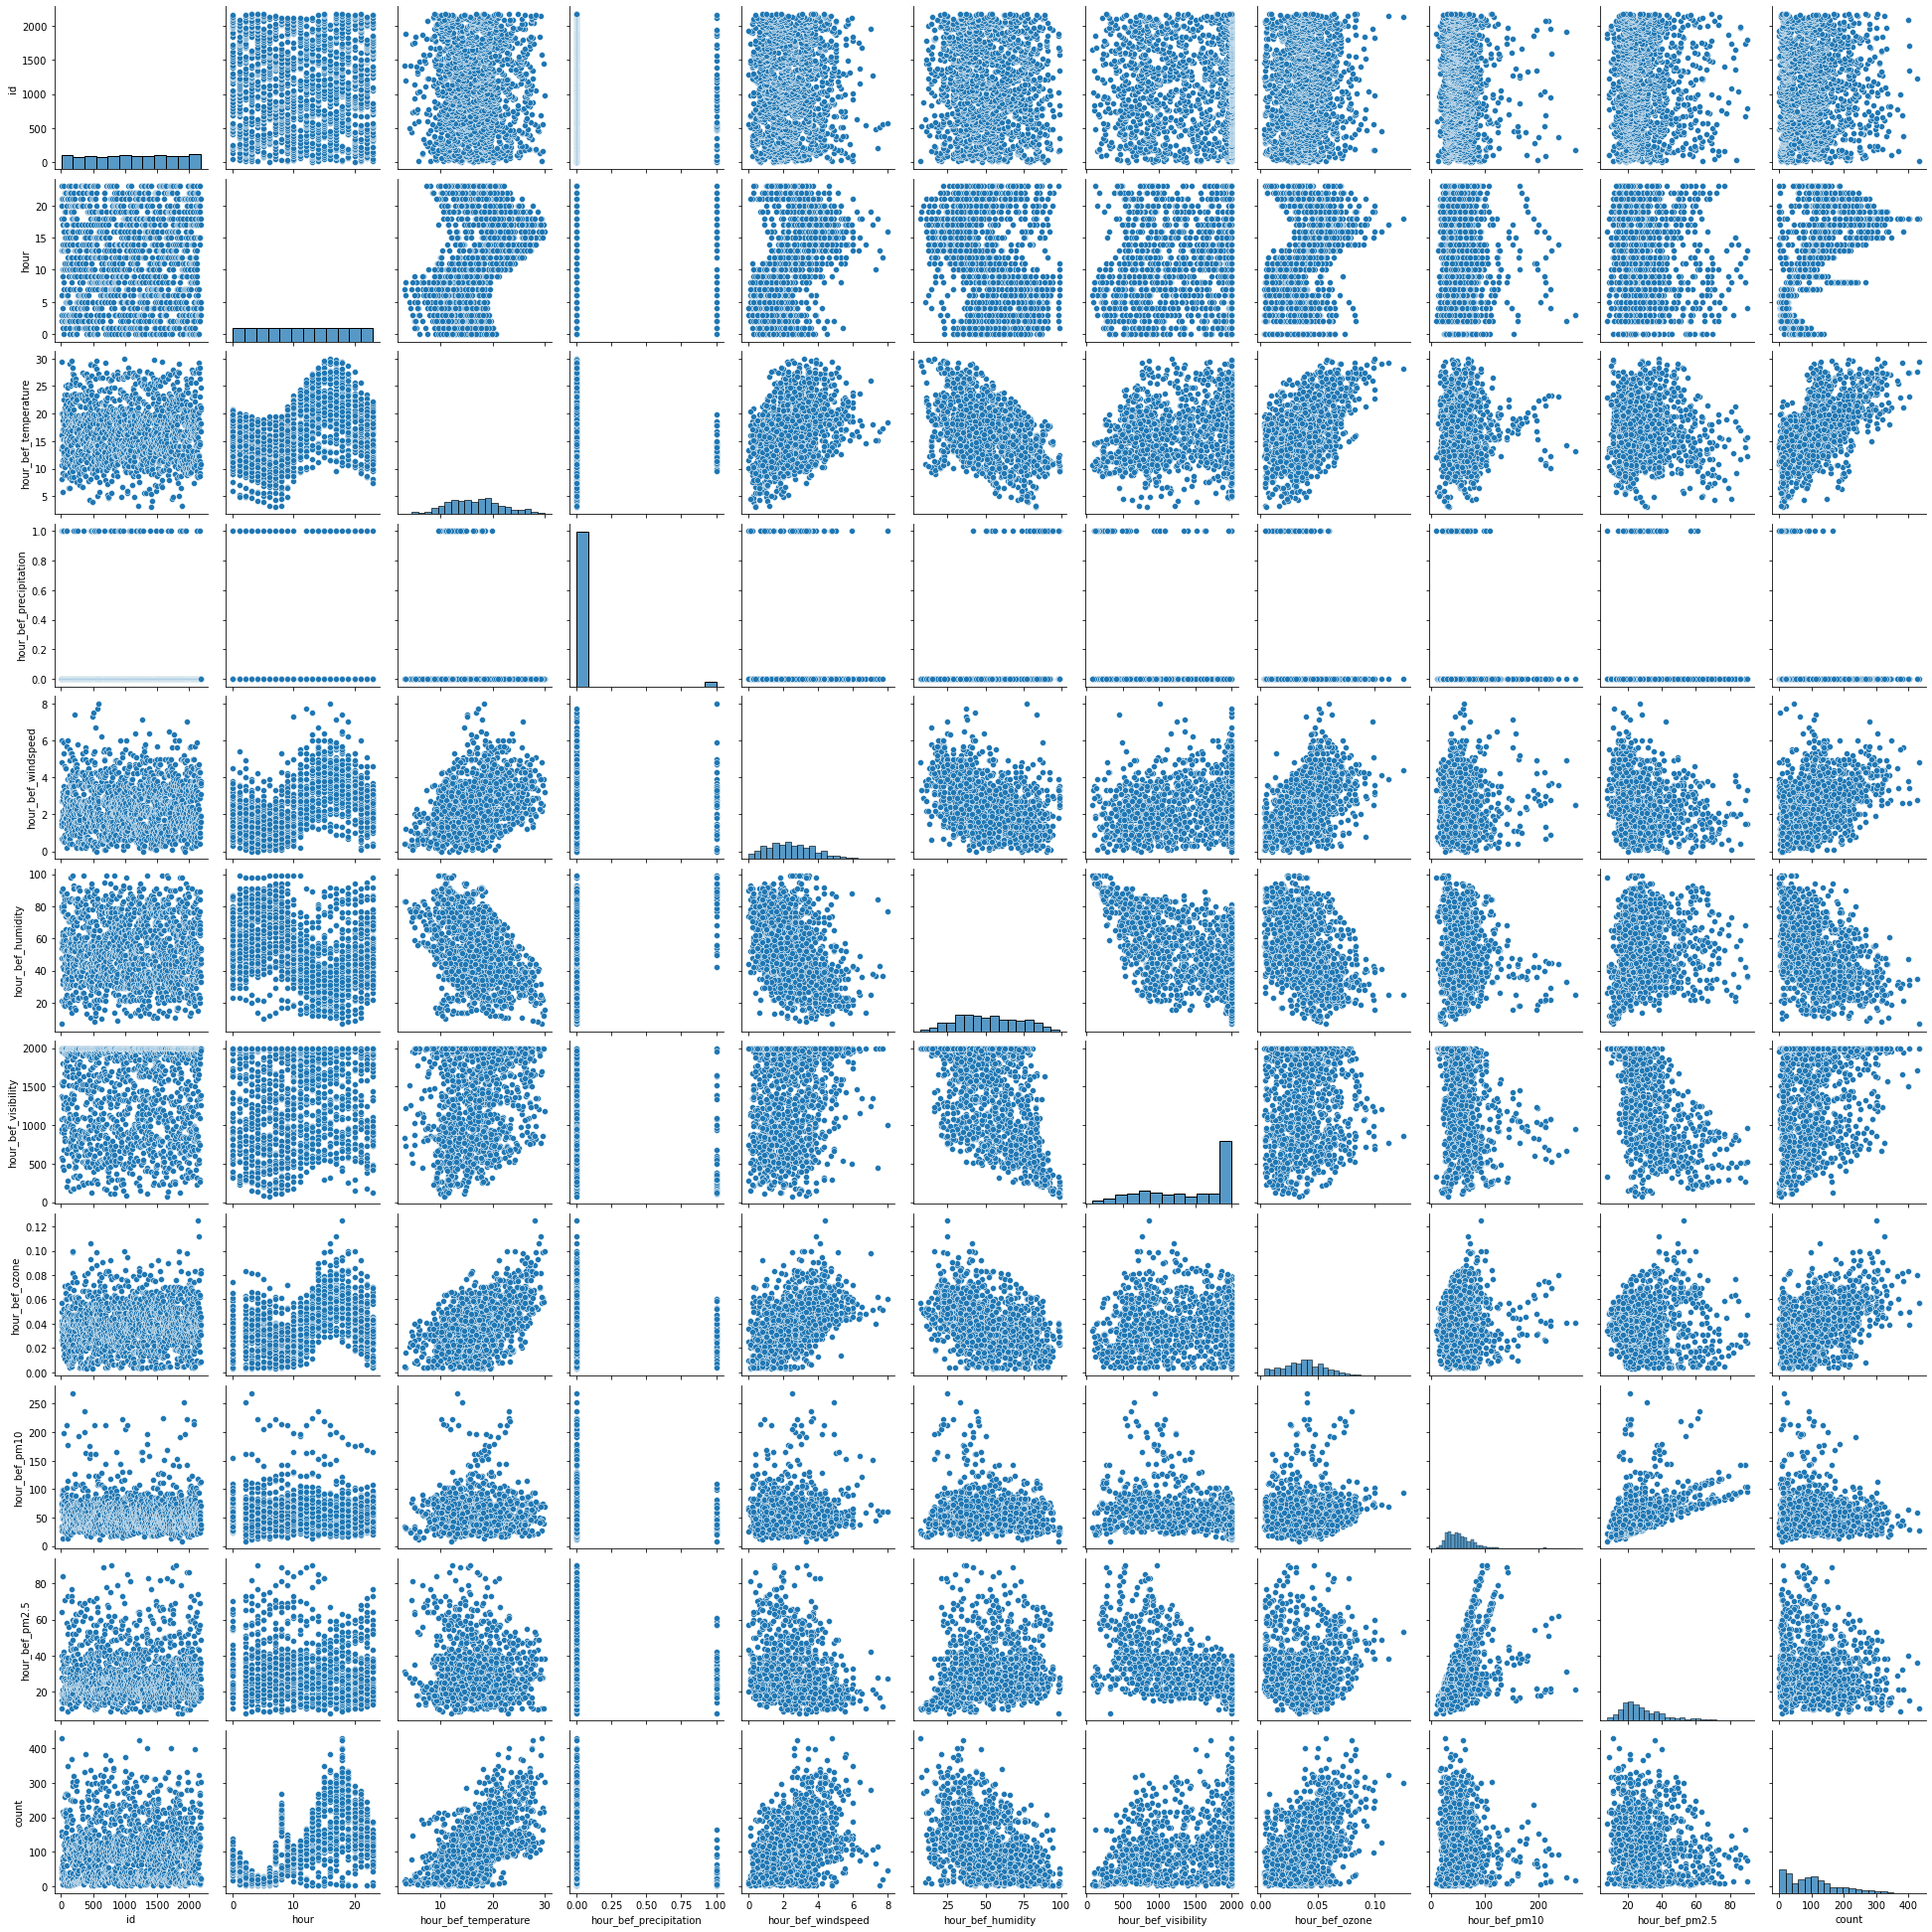

In [12]:
import seaborn as sns
sns.pairplot(train)

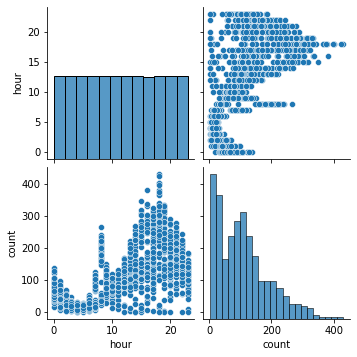

In [13]:
sns.pairplot(train.loc[:, ['hour', 'count']])

1. 18 ~ 20시에 사용량이 높아진다. 아마 퇴근 시간?

2. 온도와 상관 관계가 높다? = 기온이 올라갈 때보다 내려갈 때가 count가 낮다.

3. 습도와 온도는 상관 관계가 있다. 온도가 올라갈수록 습도가 올라간다. 즉, 여름에 습도가 올라간다.

데이터의 개수가 적고, feature의 수도 적어서 굳이 차원 축소를 할 필요는 없을 것 같다.

또한, pairplot을 본 결과 적합 선이 대부분의 경우에서 비선형으로 나타난다. (aoc커브 형 곡선?)

train이 1459개이고, feature는 11개

데이터의 수가 적고, test data에서 정답 레이블이 주어지지 않아 모델의 성능을 확인하는 것이 제한적이므로 k-fold를 사용한 tree based model이 적절할 것 같다.

In [10]:
train.shape

(1459, 11)

### 결측치 확인

In [14]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

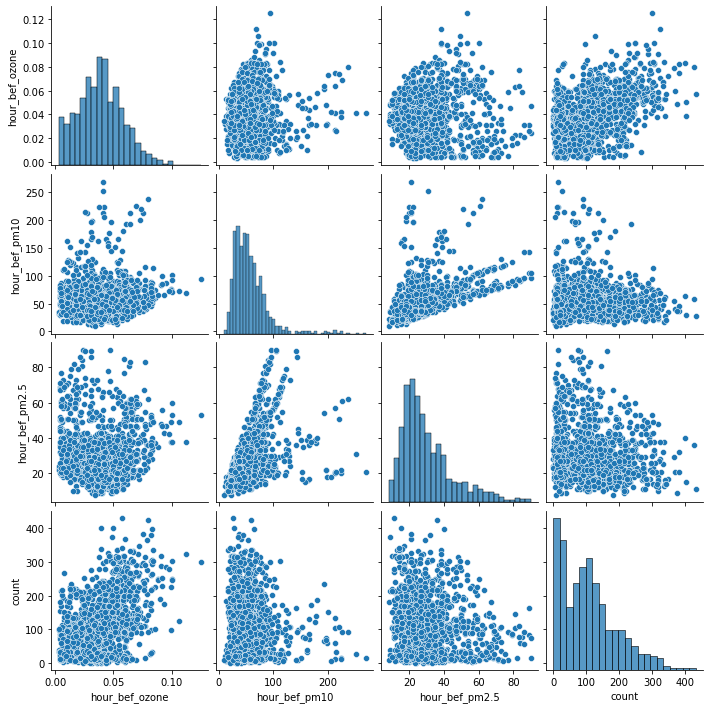

In [15]:
col_na = ['hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']
sns.pairplot(train.loc[:, col_na])

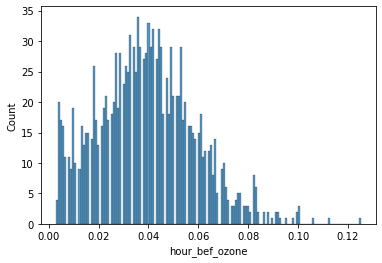

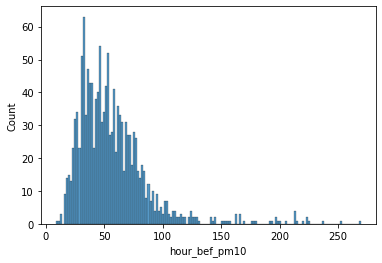

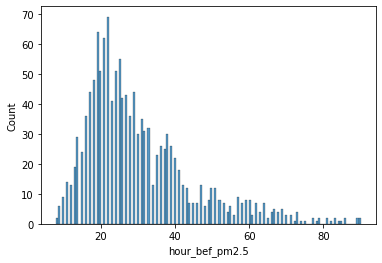

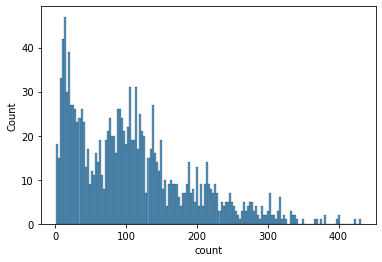

In [18]:
for i in col_na:
    sns.histplot(train, x= i, bins = 150, stat = 'count')
    plt.show()

In [29]:
ozone = train.iloc[np.where(train.loc[:, 'hour_bef_ozone'].isna())]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [31]:
## 결측치 대체

for i in col_na[:-1]:
    train.fillna({i : int(train[i].median())}, inplace = True)

In [32]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      2
hour_bef_precipitation    2
hour_bef_windspeed        9
hour_bef_humidity         2
hour_bef_visibility       2
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [38]:
train.dropna(axis =0, inplace = True)
train.shape

(1450, 11)

### 정규화

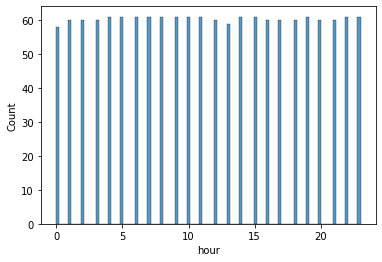

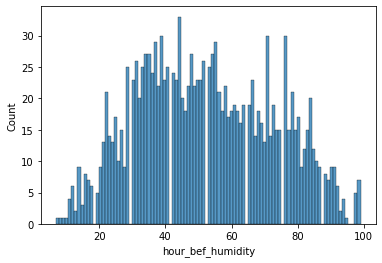

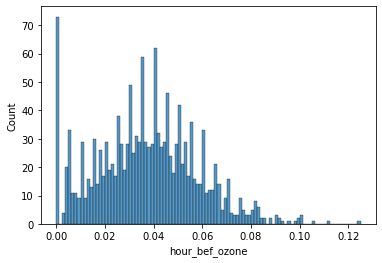

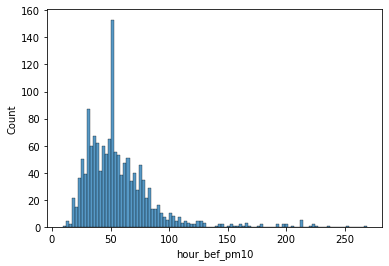

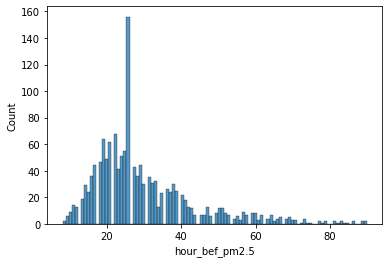

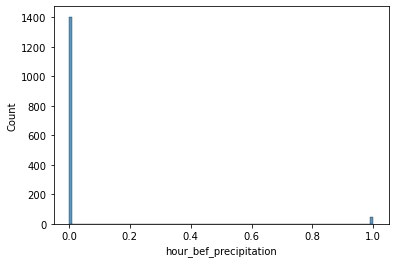

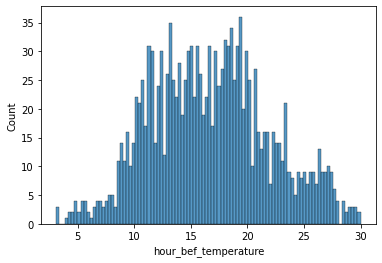

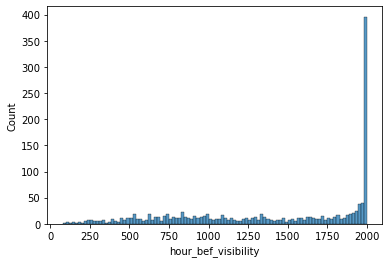

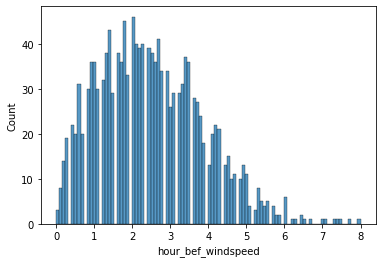

In [48]:
not_id = list(train.columns[:-1].difference(['id']))

for i in not_id:
    sns.histplot(train, x = i, stat = 'count', bins = 100)
    plt.show()

In [43]:
train.columns[:-1].difference(['id'])

Index(['hour', 'hour_bef_humidity', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5', 'hour_bef_precipitation', 'hour_bef_temperature',
       'hour_bef_visibility', 'hour_bef_windspeed'],
      dtype='object')

정규화해줄 것 : hour, visibility, precipitation 빼고 다

In [6]:
train_y = train.loc[:, 'count']
data = train.drop(['id', 'count'], axis = 1)

not_scale = ['hour', 'hour_bef_precipitation', 'hour_bef_visibility']

In [7]:
for_scale = data.loc[:, data.columns.difference(not_scale)]
for_scale

,hour_bef_humidity,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_bef_temperature,hour_bef_windspeed
0,89.0,0.027,76.0,33.0,16.3,1.5
1,48.0,0.042,73.0,40.0,20.1,1.4
2,79.0,0.033,32.0,19.0,13.9,0.7
3,54.0,0.040,75.0,64.0,8.1,2.7
4,7.0,0.057,27.0,11.0,29.5,4.8
...,...,...,...,...,...,...
1454,53.0,0.031,37.0,27.0,16.8,1.6
1455,45.0,0.039,34.0,19.0,10.8,3.8
1456,54.0,0.009,30.0,21.0,18.3,1.9
1457,37.0,0.082,71.0,36.0,20.7,3.7


## 모델

In [8]:
X = train.drop(['id', 'count'], axis = 'columns')
y = train.loc[:, 'count']

In [1]:
os.chdir('/Users/choeunsol/Python/function')

import xgboost as xgb
import optuna
import matplotlib.pyplot as plt
import graphviz
import pickle
import numpy as np
import pandas as pd
import lightgbm as lgbm
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold as KFold
from sklearn.metrics import f1_score, mean_squared_error, accuracy_score

from tuning_generalization import xgb_objective, light_objective

In [11]:
sampler = TPESampler(seed = 0)

tuned_xgb = optuna.create_study(
    study_name = 'xgboost params',
    direction = 'minimize',
    sampler = sampler
)

obj_xgb = lambda trial : xgb_objective(trial, X, y, regressor_name='regressor')
tuned_xgb.optimize(obj_xgb, n_trials = 100)

[I 2023-03-04 17:47:26,215] A new study created in memory with name: xgboost params
/Users/choeunsol/Python/function/tuning_generalization.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
/Users/choeunsol/Python/function/tuning_generalization.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
/Users/choeunsol/Python/function/tuning_generalization.py:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

In [10]:
sampler = TPESampler(seed = 0)

tuned_lgbm = optuna.create_study(
    study_name = 'lightboost params',
    direction = 'minimize',
    sampler = sampler
)

obj_lgbm = lambda trial : light_objective(trial, X, y, regressor_name='regressor')
tuned_lgbm.optimize(obj_lgbm, n_trials = 100)

[I 2023-03-04 17:45:56,674] A new study created in memory with name: lightboost params
/Users/choeunsol/Python/function/tuning_generalization.py:66: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.0, 1.0),
/Users/choeunsol/Python/function/tuning_generalization.py:67: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.0, 1.0),
/Users/choeunsol/Python/function/tuning_generalization.py:68: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0

In [12]:
tuned_lgbm.best_value

36.89595062174355

In [13]:
tuned_xgb.best_value

37.3751283076031